<a href="https://colab.research.google.com/github/bugsotim/BSC_DPDM2025/blob/main/CH3_Data_Prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning data

# ส่วนใหม่

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BSC/flooding database.csv')

In [ ]:
flood = pd.read_csv('/content/drive/MyDrive/BSC/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


## Missing data

## Check missing Data

In [ ]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [ ]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


##Drop record ที่มี missing ออก

Drop ถ้ามี missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

## Drop เฉพาะเกิด missing ในตัวแปรที่เราใช้
- dfo_country
- dfo_other_country
- dfo_began
- dfo_ended
- dfo_dead
- dfo_cause
- dfo_severity


In [ ]:
flood_drop2 = flood.dropna(subset=['dfo_country',
'dfo_other_country',
'dfo_began',
'dfo_ended',
'dfo_dead',
'dfo_cause',
'dfo_severity'])

flood_drop2.shape

(637, 23)

## เติม Dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood_filldummy = flood.fillna[{'dfo_other_country'}]

TypeError: 'method' object is not subscriptable

In [ ]:
flood.isnull().sum()

#### เติม missing ด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

In [ ]:
flood_fillmode = flood.fillna({'dfo_cause':'unknow'})

### เติมด้วยค่ากลาง

### เติมด้วยตัวแทนของกลุ่ม

In [ ]:
flood.groupby('dfo_severity,'dfo_cause').count()

In [ ]:
flood_sever1 = flood[flood['dfo_severity']==1.0]
flood_sever15 = flood[flood['dfo_severity']==1.5]
flood_sever2 = flood[flood['dfo_severity']==2.0]

In [ ]:
flood_sever1 = flood[flood['dfo_severity']==1.0]
flood_sever15 = flood[flood['dfo_severity']==1.5]
flood_sever2 = flood[flood['dfo_severity']==2.0]

## Noisy Data

In [ ]:
flood['gfd_area']

### plot data

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot(flood['gfd_area'])

## Binning

### ใช้ Histrogram ดู bin ที่เหมาะสม

In [ ]:
outputhist = plt.hist(flood['gfd_area'],30);

In [ ]:
outputhist[1]

In [ ]:
def put_value_into_bins(value,bin_edge) :
  for i in range(len(bin_edge)-1):
    if value >= bin_edge[i] and value < bin_edge[i+1]:
      new_val = (bin_edge[i]+bin_edge[i+1])/2
      return new_val
  return None

In [ ]:
put_value_into_bins(3000,outputhist[1])

In [ ]:
flood['gdf_area_bin'] = flood['gfd_area'].apply(lambda x : put_value_into_bins(x,outputhist[1]))

In [ ]:
plt.plot(flood['gdf_area_bin'])

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area'])
plt.subplot(2,1,2)
plt.plot(flood['gdf_area_bin'])

In [ ]:
|plt.subplot(2,1,1)
plt.plot(flood['gfd_area'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gdf_area_bin'].sort_values().reset_index(drop=True))

## outlier Removal

In [ ]:
outputbox = plt.boxplot(flood['gfd_area'], vert=False,whis=10);

In [ ]:
outputbox

In [ ]:
outputbox['whiskers'][1].get_xdata()

In [ ]:
outputbox['whiskers'][0].get_xdata()

In [ ]:
outputbox['fliers'][0].get_xdata()

### remove outliers

In [ ]:
flood_nooutlier = flood[flood['gfd_area']<outputbox['whiskers'][1].get_xdata()[1]]

In [ ]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'], vert=False,whis=10);

In [ ]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

# Data Integration

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project = pd.read_csv('/content/drive/MyDrive/BSC/Copy of opendata_project-2.csv')
unittype = pd.read_csv('/content/drive/MyDrive/BSC/Copy of opendata_unittype-2.csv')


In [ ]:
project.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [ ]:
unittype.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [ ]:
for i in  unittype.columns:
  print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


In [ ]:
for i in  project.columns:
  print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


### Add more column to the table (X-Data Integration)
map()

In [ ]:
unittype['project_id'].map(project.set_index('project_id')['name_th'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
unittype['project_id'].map(project.set_index('project_id')['name_th','developer_name_th','neighborhood_name_th'
                                                           , 'subdistrict_name_th' ,'district_name_th' , 'province_name_th'])

KeyError: ('name_th', 'developer_name_th', 'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th', 'province_name_th')

## Deduplication

ดูก่อนว่า data มัน Duplicate ยังไง

In [ ]:
project.duplicated().any()

np.True_

In [ ]:
project.duplicated().sum()

np.int64(2)

In [ ]:
project[project.duplicated(keep=False)]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
138,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5610,NaN,ขนส่งปทุม,3611,BAN CHANG,บ้านฉาง,3600,MUEANG PATHUM THANI,เมืองปทุมธานี,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8103,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10204,NaN,ขนส่งปทุม,3656,BANG PHO NUEA,บางโพธิ์เหนือ,3647,SAM KHOK,สามโคก,3599,Pathum Thani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ลบข้อมูลที่มี Project_id ซ้ำกัน โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด (ตัึวล่าง)

In [ ]:
project_dedup = project.drop_duplicates(subset=['project_id'],keep = 'last')

map ที่ไม่มี Duplicate index

In [ ]:
unittype['project_id'].map(project_dedup.set_index('project_id')['name_th'])

,project_id
0,ไลฟ์ แอท รัชดา - สุทธิสาร
1,บ้านสวนทรัพย์ธานี
2,สกายไลน์ อมตะ
3,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ
...,...
43369,บ้านคุรุสภา นครราชสีมา
43370,บ้านเต็มสิริ 1
43371,พระเงิน เพลส
43372,บ้านไทยวิลล่า ศรีราชา


In [ ]:
unittype['ชื่อโครงการ'] = unittype['project_id'].map(project_dedup.set_index('project_id')['name_th'])

### HW3


In [ ]:
unittype['ชื่อผู้พัฒนา'] = unittype['project_id'].map(project_dedup.set_index('project_id')['developer_name_th'])
unittype['ย่าน'] = unittype['project_id'].map(project_dedup.set_index('project_id')['neighborhood_name_th'])
unittype['ตำบล'] = unittype['project_id'].map(project_dedup.set_index('project_id')['subdistrict_name_th'])
unittype['อำเภอ'] = unittype['project_id'].map(project_dedup.set_index('project_id')['district_name_th'])
unittype['จังหวัด'] = unittype['project_id'].map(project_dedup.set_index('project_id')['province_name_th'])

In [ ]:
unittype.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


## Add more data (Y-data integration)

In [ ]:
unittype.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,บ้านสวนทรัพย์ธานี,บริษัท เอส.พี.เอ็น.แลนด์ จำกัด,คลองส่งน้ำ1,ปรุใหญ่,เมืองนครราชสีมา,นครราชสีมา
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,สกายไลน์ อมตะ,บริษัท เจเคเอส ฟิวเจอร์ จำกัด,อมตะซิตี้ระยอง,มาบยางพร,ปลวกแดง,ระยอง
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,รุ่งเรืองทรัพย์วิลเลจ @ กะปาง,บริษัท รุ่งเรืองทรัพย์ พร็อพเพอร์ตี้ จำกัด,NaN,กะปาง,ทุ่งสง,นครศรีธรรมราช
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร


สมมติว่า database เก็บแยกชนิดของบ้าน

In [ ]:
house = unittype[unittype['propertytype_name_th'] == 'บ้าน']
condo =  unittype[unittype['propertytype_name_th'] == 'คอนโด']

In [ ]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [ ]:
condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3700000.0,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4200000.0,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3350000.0,...,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15900000.0,...,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4700000.0,...,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [ ]:
house_condo = pd.concat([house,condo])
house_condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [ ]:
house.shape

(17777, 34)

In [ ]:
condo.shape

(12806, 34)

In [ ]:
house_condo.shape

(30583, 34)

## Data Transformatiom

ในกรณีที่ข้อมูลในคอลัมน์เดียวกันใช้หน่วยไม่เหมือนกัน ต้องมีการแปลงข้อมูลก่อน

ทำให้หน่วยของราคาไม่เท่ากัน (คอนโด หน่วยบาท vs บ้าน หน่วยล้านบาท)

In [ ]:
house['price_min'] = house['price_min']/1000000
house

/tmp/ipython-input-3989735810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,นนทบุรี
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,ขอนแก่น
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,นนทบุรี
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,นครราชสีมา


ตรวจสอบ Scale คร่าวๆ

In [ ]:
from matplotlib import pyplot as plt

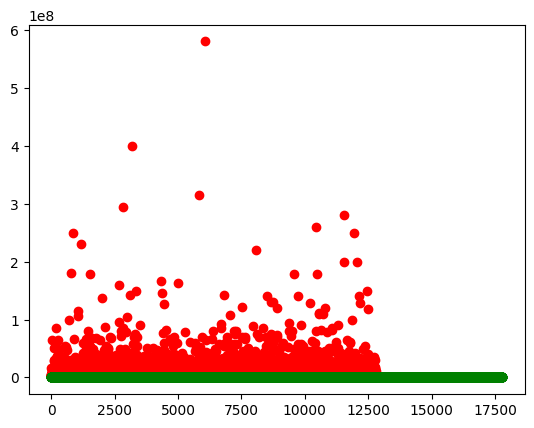

In [ ]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c='g');

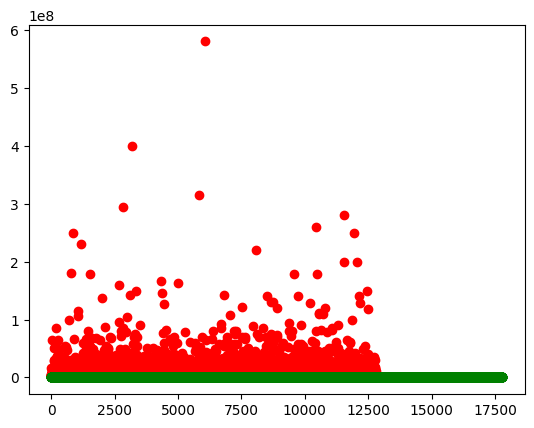

In [ ]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c='g')

แปลงค่าหน่วยของคอนโดให้เป็นหลักล้านแล้วรวม data

/tmp/ipython-input-4272591853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min']/1000000


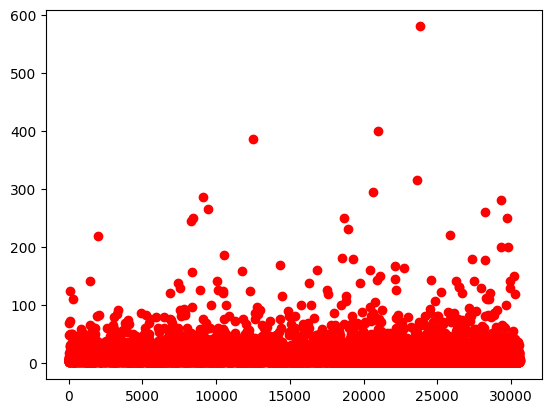

In [ ]:
condo['price_min'] = condo['price_min']/1000000
house_condo = pd.concat([house,condo])
plt.scatter(range(len(house_condo['price_min'])),house_condo['price_min'],c='r')

In [ ]:
house_condo[house_condo['price_min']>300]['url_unittype'].values

array(['https://baania.com/th/project/อสงไขย-63f6e3b09b028e00130ae6e5/บ้านเดี่ยวสามชั้น-63f6e58e9b028e00130ae6f6',
       'https://baania.com/th/project/บันยัน-ทรี-เรสซิเดนซ์-ริเวอร์ไซด์-กรุงเทพ-15531/penthouse-unittype_36249',
       'https://baania.com/th/project/โฟร์ซีซั่นส์-ไพรเวท-เรสซิเด้นซ์-2540/penthouse-unittype_7639',
       'https://baania.com/th/project/เดอะ-สุโขทัย-เรสซิเด้นซ์-16305/penthouse-unittype_37324'],
      dtype=object)

##Column Alignment

สลับคอลัมน์ของ data condo

In [ ]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'ชื่อโครงการ', 'ชื่อผู้พัฒนา', 'ย่าน', 'ตำบล', 'อำเภอ', 'จังหวัด'],
      dtype='object')

In [ ]:
colomns_titles = ([ 'ชื่อโครงการ', 'ชื่อผู้พัฒนา', 'ย่าน', 'ตำบล', 'อำเภอ', 'จังหวัด''row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',])
condo_swap = condo.reindex(columns=colomns_titles)

In [ ]:
condo_swap = pd.concat([condo_swap,house])
condo_swap.head()

,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัดrow_number,unittype_id,project_id,name_th,propertytype_id,...,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,price_min_bath,row_number,จังหวัด
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,NaN,unittype_35602,project_15270,Studio,2,...,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,3700000.0,NaN,NaN
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,NaN,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,...,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,4200000.0,NaN,NaN
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,NaN,unittype_36928,project_15818,1 Bedroom,2,...,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,3350000.0,NaN,NaN
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,NaN,unittype_37590,project_16368,4 Bedroom,2,...,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,15900000.0,NaN,NaN
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,NaN,unittype_40049,project_17461,2 Bedroom,2,...,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,4700000.0,NaN,NaN


In [ ]:
condo_swap.head()

,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัดrow_number,unittype_id,project_id,name_th,propertytype_id,...,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,price_min_bath,row_number,จังหวัด
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,NaN,unittype_35602,project_15270,Studio,2,...,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,3700000.0,NaN,NaN
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,NaN,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,...,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,4200000.0,NaN,NaN
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,NaN,unittype_36928,project_15818,1 Bedroom,2,...,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,3350000.0,NaN,NaN
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,NaN,unittype_37590,project_16368,4 Bedroom,2,...,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,15900000.0,NaN,NaN
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,NaN,unittype_40049,project_17461,2 Bedroom,2,...,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,4700000.0,NaN,NaN


In [ ]:
condo_swap.tail()

,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัดrow_number,unittype_id,project_id,name_th,propertytype_id,...,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,price_min_bath,row_number,จังหวัด
43361,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,NaN,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,...,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,NaN,2451.0,นนทบุรี
43363,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,NaN,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,...,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,NaN,1055.0,ขอนแก่น
43367,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,NaN,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,...,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,NaN,20108.0,นนทบุรี
43369,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,NaN,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,...,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,NaN,9507.0,นครราชสีมา
43370,บ้านเต็มสิริ 1,NaN,หนองจอก,คู้ฝั่งเหนือ,หนองจอก,NaN,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,...,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11,NaN,23721.0,กรุงเทพมหานคร


In [ ]:
condo_swap['price_min_bath'] = condo_swap['price_min']*1000000


In [ ]:
condo_swap.shape

(30583, 36)

In [ ]:
house.shape

(17777, 34)

In [ ]:
pd.concat([condo_swap,house])

,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัดrow_number,unittype_id,project_id,name_th,propertytype_id,...,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,price_min_bath,row_number,จังหวัด
0,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,NaN,unittype_35602,project_15270,Studio,2,...,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,3700000.0,NaN,NaN
4,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,NaN,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,...,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,4200000.0,NaN,NaN
8,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,NaN,unittype_36928,project_15818,1 Bedroom,2,...,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,3350000.0,NaN,NaN
14,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,NaN,unittype_37590,project_16368,4 Bedroom,2,...,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,15900000.0,NaN,NaN
16,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,NaN,unittype_40049,project_17461,2 Bedroom,2,...,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,4700000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,บ้านณัฐชากรีนวิลล์,NaN,ปลายบาง,บางใหญ่,บางใหญ่,NaN,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,...,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,NaN,2451.0,นนทบุรี
43363,กลันตา พลัส อีโค่ วิลเลจ,บริษัท อีสาน พิมานกรุ๊ป จำกัด,บึงแก่นนคร,พระลับ,เมืองขอนแก่น,NaN,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,...,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,NaN,1055.0,ขอนแก่น
43367,ชวนชม 5,บริษัท เวลธ์ ดีเวลลอปเปอร์ จำกัด,ไทรน้อย,ไทรน้อย,ไทรน้อย,NaN,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,...,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,NaN,20108.0,นนทบุรี
43369,บ้านคุรุสภา นครราชสีมา,NaN,บ้านใหม่1,บ้านใหม่,เมืองนครราชสีมา,NaN,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,...,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,NaN,9507.0,นครราชสีมา


## Add Data Source Column

เตรียมปัญหาโดยลบ column property type ออก

In [ ]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.50,...,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.60,...,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.79,...,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.30,...,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี


In [ ]:
house = house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])
condo = condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])

In [ ]:
condo.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,date_updated,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,Studio,NaN,30.00,3.70,NaN,NaN,NaN,...,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,ไลฟ์ แอท รัชดา - สุทธิสาร,บริษัท เอพี (ไทยแลนด์) จำกัด (มหาชน),สุทธิสาร,สามเสนนอก,ห้วยขวาง,กรุงเทพมหานคร
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),NaN,48.00,4.20,NaN,NaN,NaN,...,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,เดอะ เทมโป แกรนด์ สาทร-วุฒากาศ,บริษัท บิลท์ แลนด์ จำกัด (มหาชน),วุฒากาศ,บางค้อ,จอมทอง,กรุงเทพมหานคร
8,33884,unittype_36928,project_15818,1 Bedroom,NaN,49.00,3.35,NaN,NaN,NaN,...,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,ทองหล่อ ทาวเวอร์,NaN,ทองหล่อ,คลองตันเหนือ,วัฒนา,กรุงเทพมหานคร
14,34574,unittype_37590,project_16368,4 Bedroom,NaN,170.00,15.90,NaN,NaN,NaN,...,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,จิวเวลรี่ เทรด เซ็นเตอร์,บริษัท ซินเท็ค คอนสตรัคชั่น จำกัด (มหาชน),สีลม,สีลม,บางรัก,กรุงเทพมหานคร
16,39469,unittype_40049,project_17461,2 Bedroom,NaN,48.88,4.70,NaN,NaN,NaN,...,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,อะไรส์ รัชดา 19,บริษัท ฟอร์จูน พลัส พร็อพเพอร์ตี้ จำกัด,สถานีลาดพร้าว,จอมพล,จตุจักร,กรุงเทพมหานคร


In [ ]:
house['data_source'] = 'house'
condo['data_source'] = 'condo'
condo_houses = pd.concat([house,condo])

In [ ]:
condo_houses

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,source,url_unittype,day,ชื่อโครงการ,ชื่อผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด,data_source
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,เพอร์เฟค มาสเตอร์พีซ รัตนาธิเบศร์,บริษัท พร็อพเพอร์ตี้ เพอร์เฟค จำกัด (มหาชน),ท่าอิฐ,ไทรม้า,เมืองนนทบุรี,นนทบุรี,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,พนาสนธิ์ การ์เด้นท์ วิลล์ ภูเก็ต,บริษัท พนาสนธิ์ กรุ๊ป จำกัด,NaN,วิชิต,เมืองภูเก็ต,ภูเก็ต,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,เพลินวิว ทิวเขา,บริษัท ไลฟ แอนด์ ลีฟวิ่ง จำกัด,เก้ากิโล,สุรศักดิ์,ศรีราชา,ชลบุรี,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,พราวเรสซิเดนซ์ @ บ้านพรุ,บริษัท พีวีโฮมมิ่ง จำกัด,NaN,บ้านพรุ,หาดใหญ่,สงขลา,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บางแสน มหานคร,บริษัท บางแสนมหานครพร็อพเพอร์ตี้ จำกัด,เมืองแสนสุข,แสนสุข,เมืองชลบุรี,ชลบุรี,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,...,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,เดอะ ไพรเวซี่ พาร์ค รามอินทรา,บริษัท พฤกษา เรียลเอสเตท จำกัด (มหาชน),วัดไตรรัตนาราม,อนุสาวรีย์,บางเขน,กรุงเทพมหานคร,condo
43357,32766,unittype_32126,project_13619,1 Bedroom,NaN,31.0,6.50,NaN,NaN,NaN,...,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,วาลเด้น อโศก,บริษัท ฮาบิแทท กรุ๊ป จำกัด,อโศก,คลองเตยเหนือ,วัฒนา,กรุงเทพมหานคร,condo
43364,12599,unittype_24778,project_9877,2 Bedroom,NaN,49.0,3.50,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,ซีซี คอนโดมิเนียม 2,บริษัท รวมโชคพัฒนา (พัทยา) จำกัด,บุญสัมพันธ์,หนองปรือ,บางละมุง,ชลบุรี,condo
43366,11147,unittype_35831,project_15356,Studio,NaN,27.0,4.99,NaN,NaN,NaN,...,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,ไอดีโอ โมบิ รางน้ำ,บริษัท อนันดา ดีเวลลอปเม้นท์ จำกัด (มหาชน),รางน้ำ,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,condo


# PCA (X-axis feature)

อยู่อีก colab [PCA](https://colab.research.google.com/drive/12NlXp8TraHRdPpdaRHJ4nHcGD0iN35DH#scrollTo=qKaN9bkd-maU)

# Sampling (Y-aixs feature)

- balanced data (class $\hat Y$ balanced)

In [ ]:
project.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


### สมมติเราจะสร้างโมเดลทำนายว่าข้อมูลที่ให้มาเป็น Propertytype แบบไหน (บ้านหรือคอนโด)

In [ ]:
home = project[project['propertytype_name_th'] == 'บ้าน']

In [ ]:
condo = project[project['propertytype_name_th'] == 'คอนโด']

In [ ]:
print (f'home : {home.shape}')
print (f'condo : {condo.shape}')

home : (8859, 46)
condo : (4796, 46)


### เราต้องการ data ที่ balance เพื่อสอน model ให้มีประสิทธิภาพ

เลือกมาแค่ home 4796 rows

In [ ]:
home.sample()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
19178,2722.0,5ff7d9b20b07fc001203a4bd,Phakkhamon Exclusive,บ้านภัคมล เอ็กคูซีฟ,1,Detached House,บ้าน,2890000.0,developer_10510,NaN,...,NaN,1.0,1.0,1.0,2021-01-08 11:04:02,NaN,2022-03-09 16:30:04,baania,https://baania.com/th/project/บ้านภัคมล-เอ็กคู...,2023-06-11


## กำหนด seed - random_satate เพื่อให้ผลการ random เหมือนกันทุกครั้ง

In [ ]:
home.sample(random_state = 6)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
6802,23208.0,project_12666,Kunapat 1,บ้านคุณาภัทร 1,1,Detached House,บ้าน,2650000.0,developer_5663,NaN,...,0.0,0.0,0.0,1.0,2017-12-20 09:14:14,NaN,2020-12-04 10:43:56,baania,https://baania.com/th/project/บ้านคุณาภัทร-1-p...,2023-06-11


## สุ่ม data มาตามสัดส่วนที่ต้องการ

In [ ]:
home.sample(frac = 0.5 , random_state = 6).shape

(4430, 46)

### สุ่่มแบบหยิบคืน (Repplace  = True)

In [ ]:
home.sample(n=10, random_state = 6 , replace=True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
7293,15880.0,624b087faae18f0013406c8e,Sanransiri Ramkhamhaeng,สราญสิริ รามคำแหง,1,Detached House,บ้าน,7000000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-04-04 22:02:23,NaN,2023-03-09 16:53:12,baania,https://baania.com/th/project/สราญสิริ-รามคำแห...,2023-06-11
22634,7550.0,project_10503,World Villa,เวิลด์วิลล่า,1,Detached House,บ้าน,7500000.0,developer_6811,"World Estate Development Co.,Ltd.",...,NaN,1.0,1.0,NaN,2017-10-04 15:45:29,NaN,2020-12-04 10:46:30,baania,https://baania.com/th/project/เวิลด์วิลล่า-pro...,2023-06-11
12568,17152.0,project_15437,Phanpraugsa Phase 2,พรรณพฤกษา เฟส 2,1,Detached House,บ้าน,3990000.0,developer_8911,NaN,...,1.0,1.0,0.0,1.0,2019-04-29 13:48:39,2019-12-31 07:00:00,2020-12-04 10:31:19,baania,https://baania.com/th/project/พรรณพฤกษา-เฟส-2-...,2023-06-11
22958,12445.0,646de96c5aa9150013a9a9e1,Phanason Resort (Laemhin),พนาสนธิ์ รีสอร์ท (แหลมหิน),1,Detached House,บ้าน,7500000.0,developer_2300,"PHANASON GROUP CO., LTD.",...,NaN,NaN,NaN,1.0,2023-05-24 17:39:40,2014-01-01 07:00:00,2023-05-24 18:00:05,baania,https://baania.com/th/project/พนาสนธิ์-รีสอร์ท...,2023-06-11
17333,10029.0,project_7510,Baan Arpakorn 3,บ้านอาภากร 3,1,Detached House,บ้าน,3990000.0,developer_5206,NaN,...,1.0,NaN,NaN,1.0,2017-05-29 15:47:28,2012-12-31 07:00:00,2020-12-04 10:37:42,baania,https://baania.com/th/project/บ้านอาภากร-3-pro...,2023-06-11
14378,16412.0,project_11938,The Enter Together,ดิ เอ็นเทอร์ ทูเก็ตเทอร์,1,Detached House,บ้าน,2000000.0,developer_5971,"Kanlapaphruek Development Co., Ltd.",...,NaN,NaN,NaN,1.0,2017-11-28 13:37:06,2012-03-31 07:00:00,2020-12-04 10:42:04,baania,https://baania.com/th/project/ดิ-เอ็นเทอร์-ทูเ...,2023-06-11
19451,4742.0,project_426,Preukpirom,พฤกษ์ภิรมย์,1,Detached House,บ้าน,1209000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2015-10-15 11:32:24,NaN,2020-12-04 10:36:42,baania,https://baania.com/th/project/พฤกษ์ภิรมย์-proj...,2023-06-11
11000,10335.0,project_2007,Baan Rungnirun 4,บ้านรุ่งนิรันดร์ โครงการ 4,1,Detached House,บ้าน,850000.0,developer_1362,NaN,...,NaN,NaN,NaN,NaN,2016-09-02 16:42:11,NaN,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านรุ่งนิรันดร์...,2023-06-11
6707,3676.0,project_15755,Baan Suk Chai Villeage,บ้านสุขใจ วิลเลจ,1,Detached House,บ้าน,3200000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2019-06-27 10:53:37,NaN,2020-12-04 10:42:23,baania,https://baania.com/th/project/บ้านสุขใจ-วิลเลจ...,2023-06-11
6291,7652.0,project_6275,Passorn 3 Rangsit Klong 3,ภัสสร 3 รังสิต คลอง 3,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-04-25 17:23:56,NaN,2020-12-04 10:37:04,baania,https://baania.com/th/project/ภัสสร-3-รังสิต-ค...,2023-06-11


### สุ่มแบบ over-sampling (ให้ data มันมากขึ้น)

In [ ]:
condo.sample(n=8859,random_state = 6 )

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
condo.sample(n=8859,random_state = 6 ,replace =True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
13942,5579.0,project_2687,The Plenary Sathorn,เดอะ เพลนเนอรี่ สาทร,2,Condo,คอนโด,2490000.0,developer_1785,GENERAL ENVIRONMENTAL CONSERVATION PUBLIC COMP...,...,NaN,NaN,1.0,1.0,2016-11-23 14:48:42,2015-12-31 07:00:00,2022-10-07 21:00:05,baania,https://baania.com/th/project/เดอะ-เพลนเนอรี่-...,2023-06-11
1385,19608.0,project_2611,The Teak Phattanakarn-Thonglor,เดอะ ทีค พัฒนาการ-ทองหล่อ,2,Condo,คอนโด,2790000.0,developer_1997,NaN,...,1.0,NaN,1.0,1.0,2016-11-21 10:35:58,2016-06-30 07:00:00,2020-12-04 10:48:26,baania,https://baania.com/th/project/เดอะ-ทีค-พัฒนากา...,2023-06-11
10074,1542.0,project_17062,Quintara Treehaus Sukhumvit 42,ควินทารา ทรีเฮาส์ สุขุมวิท 42,2,Condo,คอนโด,4090000.0,developer_2008,NaN,...,1.0,1.0,1.0,1.0,2019-12-02 10:18:07,2020-04-30 07:00:00,2021-01-08 11:30:05,baania,https://baania.com/th/project/ควินทารา-ทรีเฮาส...,2023-06-11
23489,13352.0,project_4205,Phat Condominium,ภัทรคอนโดมิเนียม,2,Condo,คอนโด,313000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,2017-02-27 09:14:35,NaN,2020-12-04 10:40:11,baania,https://baania.com/th/project/ภัทรคอนโดมิเนียม...,2023-06-11
1913,13681.0,project_3464,Zelle Salaya,เซล ศาลายา,2,Condo,คอนโด,1790000.0,developer_1762,"PRINSIRI PUB CO., LTD.",...,1.0,1.0,1.0,1.0,2017-01-23 08:46:55,2019-12-31 07:00:00,2023-04-24 16:00:05,baania,https://baania.com/th/project/เซล-ศาลายา-proje...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,7160.0,project_3008,Blossom Condo @Fashion Altitude,บลอสซั่ม คอนโด แอท แฟชั่น อัลติจูด,2,Condo,คอนโด,2000000.0,developer_1960,"SIAMESE ASSET PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2016-12-08 14:56:28,2017-12-31 07:00:00,2023-04-20 16:30:02,baania,https://baania.com/th/project/บลอสซั่ม-คอนโด-แ...,2023-06-11
6930,3364.0,project_14814,Baan Nub Kluen,บ้านนับคลื่น,2,Condo,คอนโด,3900000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2018-10-08 09:05:03,2009-12-31 07:00:00,2020-12-04 10:41:44,baania,https://baania.com/th/project/บ้านนับคลื่น-pro...,2023-06-11
12093,1706.0,project_6248,The Excel Bearing,ดิเอ็กซ์เซล แบริ่ง,2,Condo,คอนโด,1490000.0,developer_2012,"All Inspire Development Pub Co., Ltd.",...,NaN,NaN,1.0,1.0,2017-04-25 11:43:24,2015-12-31 07:00:00,2021-03-18 15:30:05,baania,https://baania.com/th/project/ดิเอ็กซ์เซล-แบริ...,2023-06-11
16803,20179.0,project_969,NHA Chiang Mai (Night Safari),บ้านเอื้ออาทรจังหวัดเชียงใหม่ (ไนท์ซาฟารี),2,Condo,คอนโด,630000.0,developer_9533,NATIONAL HOUSING AUTHORITY,...,NaN,1.0,NaN,1.0,2015-11-05 13:24:04,NaN,2020-12-04 10:41:21,baania,https://baania.com/th/project/บ้านเอื้ออาทรจัง...,2023-06-11
